# ML for science - Unfold
## Baudoin von Sury - Pierre Vuillecard - Hugo Birch

### This notebook present the different predictions of CL and CP using regression machine learning method.

We used the sklearn python librairy (https://scikit-learn.org) to perform different regression on our data.

- Part 1 : Prediction of CP from kinematic alpha
- Part 2 : Prediction of CL from kinematic alpha

In [1]:
# importation of different librairies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import probplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

from helpers import*
from regression import*

# Set the seed
np.random.seed(123)

In [2]:
# Definition of the path of the data
path = os.getcwd()
path = path + '/ml_data/complete/complete/'

# Part 1 : Prediction of CP from kinematic alpha

In [3]:
# Load the data (CP and kinematic alphas for the N_EXP experiments)
N_EXP = 4100
N_train=3075
CP = load_data(path,N_EXP, cl = False)
NB_PLOT=20
# Shuffle the data
random_permuted_indices = np.random.permutation(N_EXP)
CP = CP[random_permuted_indices,:,:]

### Implement the window
As CP and alpha is time dependant, we implemented a window in order to include prior and posterior inputs.

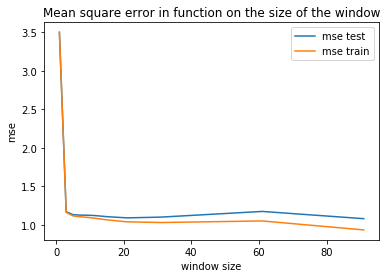

In [4]:
# Set different window sizes
window=[1,3,5,7,9,11,13,15,21,31,61,91]

# Procceed a cross validation for the different windows with k_fold = 4
mse_te , mse_tr = cv_n(CP,window)

# plot the mse for the train and test set for the different windows
plt.figure()
plt.plot(window , mse_te, label = "mse test")
plt.plot(window , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function on the size of the window")
plt.xlabel("window size")
plt.ylabel("mse")
plt.show()

Remarks regarding the size of the window :
    - The bigger the size of the window is, the more complex the models are.
    - As the size of the window increase, the CP prediction length get smaller at the boundaries.
    
Remarks on the results : From the graph, it is obvious that a window is necessary. As a good trade-off we choose the window n = 5.

### Implementation of the regularized linear regression

To prevent overfitting, we try to implement a regularizer alpha using the norm L2 of the weights w. In order to choose the value of alpha, we do a cross validation for different value of the regularizer.

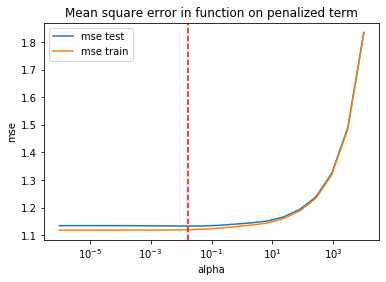

The best regularized term is alpha =  0.01623776739188721


In [5]:
# Set the different values of the regularizer term alpha
alphas = np.logspace(-6, 4, 20)
# Set the value of the window to 5
window = 5
# Perform a cross validation for different value of alpha
mse_te ,mse_tr = cv_regularization(CP,alphas,window)

# Plot the results
plt.figure()
plt.semilogx(alphas , mse_te, label = "mse test")
plt.semilogx(alphas , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function on penalized term")
plt.xlabel("alpha")
plt.ylabel("mse")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.show()
print("The best regularized term is alpha = ", alphas[np.argmin(mse_te)])

###### The plot above shows us that a regularized term is nearly not necessary. The vertical red dot lines indicate the smallest mse value. In the following cell, we are going to run the same cross validation but now we are looking at the value of R2 and not the mse.

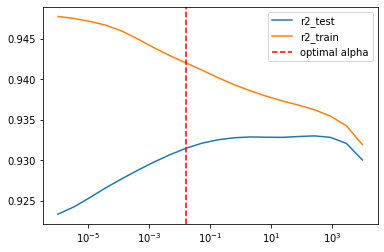

In [6]:
# Set the different values of the regularizer term alpha
alphas = np.logspace(-6, 4, 20)
# Set k_fold
k_fold = [1, 2 , 3 , 4]
mse_test = []
mse_train = []
r2_score_test = []
r2_score_train = []
for alpha in alphas:
    ridgereg = Ridge(alpha=alpha,normalize=False)
    score = cross_validate(ridgereg , CP[:,0,:], CP[:,1,:], cv = 4, scoring = "r2", return_train_score = True)
    r2_score_test.append(np.mean(score['test_score']))
    r2_score_train.append(np.mean(score['train_score']))

# Plots the results
plt.figure()
plt.semilogx(alphas,r2_score_test, label ="r2_test")
plt.semilogx(alphas,r2_score_train, label = "r2_train")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.legend()
plt.show()

###### The plot above shows us that it is actually interresting to take a regularized term to increase the performance of the model. As a good trade off between prevent underfitting and maximize R2 score, we choose alpha = 0.162.

In [7]:
print(f"For alpha = {alphas[np.argmin(mse_te)]}, we have a MSE = {np.min(mse_te)}")

For alpha = 0.01623776739188721, we have a MSE = 1.1330432231346146


### Improving the results by adding extended feautures x^2 and x^3.
We are now going to try to improve our results by adding the extended features. We are also applying the same method as above to find a regularized term. 

In [8]:
# Set the different values of the regularizer term alpha
alphas = np.logspace(-6, 4, 20)
# Set the window size to 5
window = 5
# Set the degrees values to extend x^2 and x^3
degree=[1,2,3]
# Run a cross validation
mse_te ,mse_tr, alphas = cv_regularization_degree(CP,alphas,window,degree)

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01508e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.82688e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0859e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39279e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62051e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01101e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.65166e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.57697e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.51451e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.16386e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66322e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.02947e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.27293e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39466e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49285e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.49773e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00135e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08946e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62214e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53895e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.755e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01709e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.9447e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.47809e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81376e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridg

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29097e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98613e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57238e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3043e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50207e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.00672e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29549e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.45252e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71849e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44873e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33741e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13322e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85558e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.80081e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47765e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.53912e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.8765e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.08539e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.69944e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.45394e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.27975e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.69697e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27444e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03476e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31539e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.13057e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.77584e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.66525e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.64654e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.98727e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44065e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11644e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.99215e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.8422e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.20982e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03987e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79969e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04685e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.86341e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06775e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40055e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35651e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.15606e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34989e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01162e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2656e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.41774e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.7489e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.30798e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.77104e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.5955e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.30709e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.37127e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13275e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04629e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.74615e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.95753e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.07112e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09067e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11263e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.91143e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.44868e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61813e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.1773e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.45425e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.68303e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.01003e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50661e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.90112e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61533e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.22378e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.84115e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21791e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.03313e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07701e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28446e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62976e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.34293e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.37486e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.91908e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04073e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.17549e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59118e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57702e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.95234e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.05482e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.16582e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0215e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.21663e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.86577e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71496e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34933e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51678e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.94132e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.14136e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.5994e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.95604e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.06715e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98619e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41611e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.64357e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.93679e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.70471e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.77167e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.06042e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05158e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06887e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.68864e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10929e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.22013e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.69862e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.97583e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65422e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.0911e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.22174e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2373e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13603e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03103e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01426e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.97266e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.62169e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15886e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68195e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34267e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.82163e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63963e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17286e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21777e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50094e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8384e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.5134e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.32011e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.31809e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.50648e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.63255e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.37769e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.99126e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37345e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.19715e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09488e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08865e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.19205e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87866e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.06983e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10316e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.67818e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.83968e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08862e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23193e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.06304e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43397e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09581e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.91371e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09315e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23289e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34764e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.30572e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.41215e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.83298e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13288e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.13524e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08136e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.1754e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30742e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.40552e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.06196e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08301e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84698e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21341e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.17018e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06337e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8226e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07221e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.89119e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07127e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07425e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04363e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17266e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10826e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30547e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.71182e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.63904e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.30539e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.40479e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.17469e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.35176e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.67562e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.34816e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.90553e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48602e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13728e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.55911e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.46886e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.04558e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.07394e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45403e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.66057e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50264e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.69393e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.64981e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.19973e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.29162e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.2268e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.89599e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.13344e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40249e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.85555e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.85616e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.37248e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8477e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.70239e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.56885e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.47576e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.49208e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16693e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.30864e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.88356e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.59254e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.43804e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53233e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.14918e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.43836e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.7061e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.49636e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.46726e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32088e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41496e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.871e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32683e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.68373e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0739e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32415e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.26324e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.57832e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.92424e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20769e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.5014e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53587e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28459e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40474e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46302e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78571e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69503e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.38906e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36276e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.37939e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07297e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19254e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14514e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00664e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58335e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48899e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70229e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58466e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.97391e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.17263e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.50072e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.54102e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.96088e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.55653e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40162e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33991e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.45498e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43433e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23224e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.11264e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83222e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62032e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.54188e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20639e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.03751e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.0592e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.201e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.28128e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.61098e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridg

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.02498e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.71152e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.21706e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.36671e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32848e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4405e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27495e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31392e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50547e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27709e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.48027e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.384e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.71947e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.02483e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.29957e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91708e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.37474e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.70892e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.30877e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.43451e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.6182e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.76606e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.24988e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.24659e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.3102e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.93996e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.97173e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.12334e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.48728e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.91087e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41059e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.14081e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68229e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.44981e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.28937e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.0185e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.3129e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.80367e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.35021e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.68321e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77613e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00842e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.1316e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.67921e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.09532e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.78207e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.85053e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.06883e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.53821e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.29792e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.76815e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.60626e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.45637e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50045e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51083e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.79437e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.16867e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.73037e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.41264e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46465e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.95235e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.92765e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.34259e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.20582e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.04999e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.94254e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.54755e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.09841e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.72999e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.71891e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47252e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.16918e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.76867e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.94727e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00757e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34949e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42246e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49349e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63408e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65663e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63127e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62017e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48494e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37087e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26136e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.43716e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.955e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.89458e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.13143e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.3375e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridg

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.89403e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.50765e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.14771e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.71323e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.2411e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.93834e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.40121e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.40106e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0945e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05832e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42157e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2887e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33167e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39715e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48965e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.41435e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60309e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66589e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49174e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40046e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01918e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.42388e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.49537e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.82502e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.39968e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06353e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.82347e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.97641e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.11712e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.57161e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02522e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.62266e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.64563e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.99175e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridg

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06134e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.96895e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.11993e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.28441e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.74693e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02718e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.55294e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.51111e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.83837e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.34488e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06463e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.98256e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.13924e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.57596e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.23387e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10925e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01256e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.53496e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.53736e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.8633e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0603e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.90601e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.01171e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.16954e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.62363e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

###### We can see that warnings appears when we try to apply the ridge regression with the extended features x^3. Indeed the matrix looks ill-conditionned.

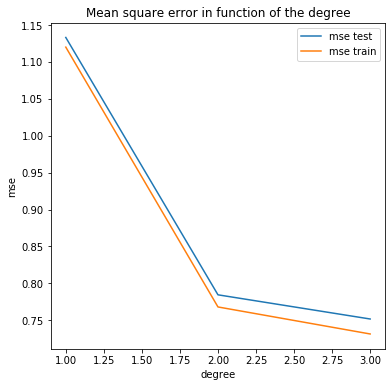

In [9]:
# Plots of the mse for different degrees features expension
plt.figure(figsize=(6,6))
plt.plot(degree , mse_te, label = "mse test")
plt.plot(degree , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function of the degree")
plt.xlabel("degree")
plt.ylabel("mse")
#plt.axvline(x=degree[np.argmin(rmse_te)],linestyle ='--',label='optimal degree',c='red')
plt.show()

###### We can see that the mse decrease for x^2 and again for x^3. But for x^3 the matrix becomes ill-conditioned. It is then a wise choice to choose degree = 2 for our extended matrix.
We then get the following mse for the optimal alpha :

In [10]:
print("The best mse is = ", mse_te[np.argmin(mse_te)] ,"for alpha = ",alphas[np.argmin(mse_te)] )

The best mse is =  0.7518337325995741 for alpha =  0.004832930238571752


###### Let's plot a few CP and their predictions:


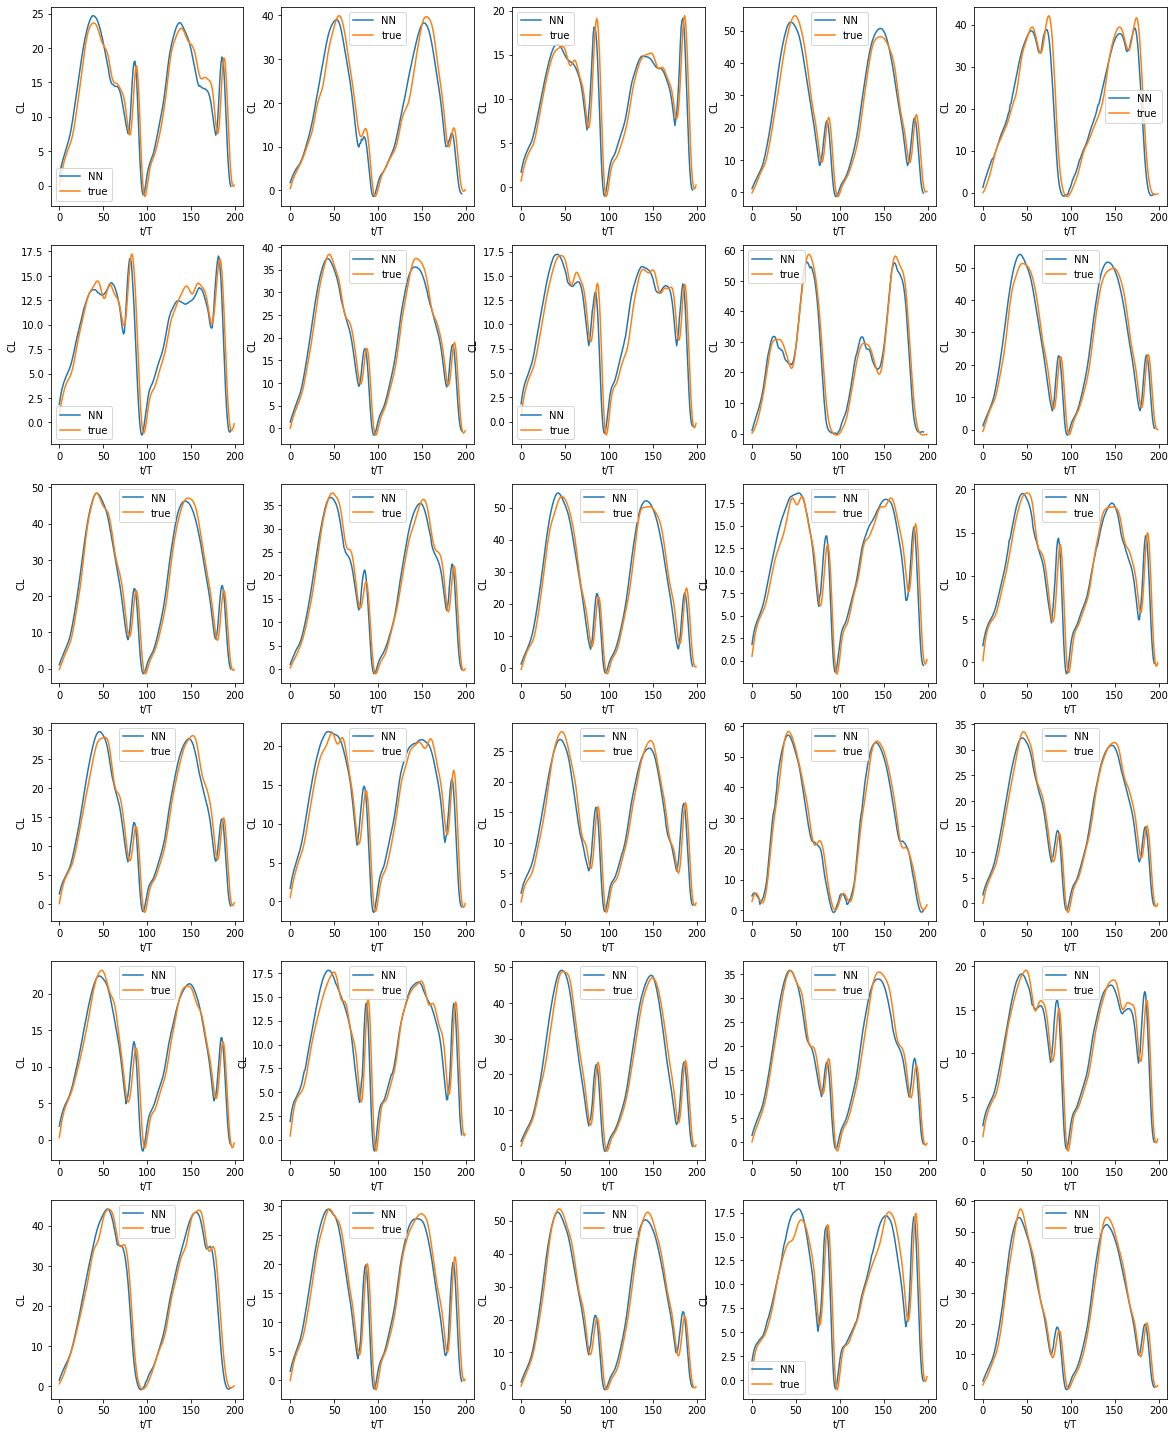

In [11]:

degree_ = 2
n = 5
alpha_=0.0162
X_train =CP[:N_train,0,:]
X_test = CP[N_train:,0,:]
Y_train = CP[:N_train,1,:]
Y_test= CP[N_train:,1,:]
y_pred = generate_prediction_n(  X_train, X_test ,Y_train, Y_test, alpha_ ,n, degree_)
N = 30
fig = plt.figure(figsize = (20,5*(N//5))) 
gs = gridspec.GridSpec((N+5)//5 , 5)
h = 0
x=np.linspace(0,1,196)
for i in range(N):
    fig_ax = fig.add_subplot(gs[h//5, h%5])
    h += 1
    fig_ax.plot(y_pred[i,:].T,label ='NN')
    fig_ax.plot(Y_test[i,:],label='true')
    fig_ax.set_xlabel('t/T')
    fig_ax.set_ylabel('CL')
    plt.legend()

# Part 2 :Prediction of CL from kinematic alpha

### We follow the same process as CL in order to find the best window, regularizer term and extended features.

<font color='red'>
All the remarks for CP are also valid for CL.
</font>

In [12]:
# Load the data (CL and kinematic alphas for the N_EXP experiments)
CL = load_data(path,N_EXP, cl = True)
# Shuffle the data
CL = CL[random_permuted_indices,:,:]

### Implement the window

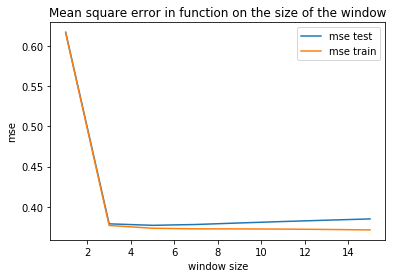

In [13]:
# Set different window sizes
window=[1,3,5,7,9,11,13,15]
# Run a cross validation for different window sizes
mse_te , mse_tr = cv_n(CL,window)

# plot the mse for the train and test set for the different windows
plt.figure()
plt.plot(window , mse_te, label = "mse test")
plt.plot(window , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function on the size of the window")
plt.xlabel("window size")
plt.ylabel("mse")
plt.show()

### Implementation of the regularized linear regression

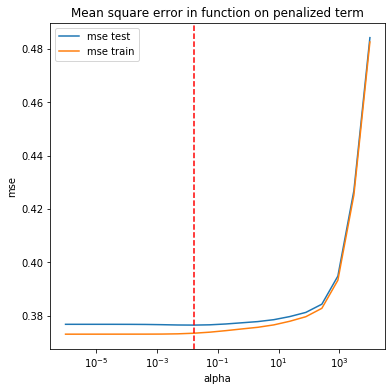

The best regularized term is alpha =  0.01623776739188721


In [14]:
# Set different value for the regularizer
alphas = np.logspace(-6, 4, 20)
window = 5
mse_te ,mse_tr = cv_regularization(CL,alphas,window)

plt.figure(figsize=(6,6))
plt.semilogx(alphas , mse_te, label = "mse test")
plt.semilogx(alphas , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function on penalized term")
plt.xlabel("alpha")
plt.ylabel("mse")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.show()
print("The best regularized term is alpha = ", alphas[np.argmin(mse_te)])

### Validation of the regularized term with R2 score

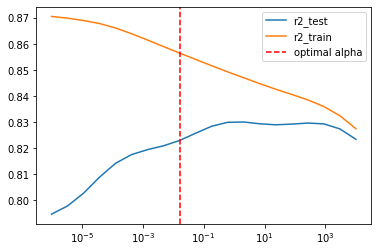

In [15]:
# Set different value for the regularizer
alphas = np.logspace(-6, 4, 20)
k_fold = [1, 2 , 3 , 4]
mse_test = []
mse_train = []
r2_score_test = []
r2_score_train = []
for alpha in alphas:
    ridgereg = Ridge(alpha=alpha,normalize=False)
    score = cross_validate(ridgereg , CL[:,0,:], CL[:,1,:], cv = 4, scoring = "r2", return_train_score = True)
    r2_score_test.append(np.mean(score['test_score']))
    r2_score_train.append(np.mean(score['train_score']))

# Plot the results
plt.figure()
plt.semilogx(alphas,r2_score_test, label ="r2_test")
plt.semilogx(alphas,r2_score_train, label = "r2_train")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.legend()
plt.show()

In [16]:
print(f"For alpha = {alphas[np.argmin(mse_te)]}, we have a MSE = {np.min(mse_te)}")

For alpha = 0.01623776739188721, we have a MSE = 0.3765403156481283


### Improving the results by adding extended feautures x^2 and x^3.

In [17]:
alphas = np.logspace(-6, 4, 20)
degree=[1,2,3]
window = 5
mse_te ,mse_tr,alphas=cv_regularization_degree(CL,alphas,window,degree)

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01508e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.82688e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0859e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39279e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62051e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03369e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.18587e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83918e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63614e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.28722e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.49773e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00135e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08946e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62214e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53895e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22103e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30388e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.755e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01709e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.9447e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridg

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.06594e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.07875e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.65238e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.97549e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.26046e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08436e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14854e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30442e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55417e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75206e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08705e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48619e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15137e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.07499e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.90866e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89722e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.94461e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.3181e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.54137e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.77869e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02541e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.17113e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.97784e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.14167e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.27507e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.25269e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15635e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24662e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40974e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59295e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42336e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.92697e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23905e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16646e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.47469e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.16471e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.96318e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.32678e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.5955e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.30709e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12072e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26065e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.22609e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32678e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.55752e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57824e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.68795e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.4593e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.79991e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.29431e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.51547e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.87141e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.47723e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.48314e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.42444e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.34293e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.37486e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.91908e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00656e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2965e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.09749e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.96811e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40185e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.87477e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.30386e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.77217e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24848e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6855e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.62217e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15748e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69768e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.92974e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.68256e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.76523e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.4721e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.36982e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.29245e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.67222e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.6995e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.74086e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.19975e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10751e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.36054e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24613e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04406e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.38433e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.3795e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.24899e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.61537e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.6223e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67629e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.12372e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.42391e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03723e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.22963e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31689e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60377e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63963e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17286e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21777e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.6405e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18376e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31717e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33846e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11812e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.22056e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.4395e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07102e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11912e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.97703e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23193e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.06304e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.92877e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.0027e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.53987e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50625e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26864e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80023e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40311e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28859e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70419e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.671e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.96805e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.22445e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.88118e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00338e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.51434e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05541e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.20005e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.81897e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29942e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.43119e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.8842e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.92804e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18638e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.14644e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.85147e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44551e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01532e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.26276e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61016e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.15189e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.72971e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.26048e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.75493e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.55563e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58862e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.84306e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.8397e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.68228e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.2817e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.16045e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.36384e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.61788e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.51082e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31713e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.50909e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48977e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.54919e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.90837e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.37572e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.77098e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.77521e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.9605e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24951e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.03083e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.98588e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.6719e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.72447e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.96288e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70739e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16072e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.63975e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.02373e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.62795e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.20491e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20304e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.51204e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.88342e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80389e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58443e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27758e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.33188e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.0186e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.44476e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.37631e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.87689e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.35924e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.28175e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.4264e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66588e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49391e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42142e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.96176e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.7408e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.98834e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.3009e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.6294e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.88901e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.0228e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridg

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51228e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.19904e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42345e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.90709e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.69718e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.88965e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22557e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.64332e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.6214e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.34546e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4561e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44389e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34252e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49172e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4953e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.98174e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.83286e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.33394e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.88563e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.25914e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.90508e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.83338e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22264e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.95883e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.4496e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70063e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.27091e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05985e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.35835e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48848e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23273e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09769e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1323e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14599e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14267e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62089e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.47165e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.88432e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53461e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34279e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.52448e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91049e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.22895e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.43959e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.00221e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78592e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.68292e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.22306e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.69747e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.00307e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.81162e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.93368e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.32649e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.72468e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.75491e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.18988e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.11741e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.80802e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.49543e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51101e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.28937e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.24726e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.99665e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.90121e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.79856e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.50414e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.0185e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.3129e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.80367e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.35021e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14209e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01001e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42722e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16871e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.19391e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.68034e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10635e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.48741e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.48006e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.17767e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.73908e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.49941e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.30374e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.20823e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.11504e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.15757e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.39599e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.97212e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.21908e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.1166e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44488e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51489e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50824e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53902e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.66077e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.92765e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.34259e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.20582e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.04999e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.40022e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08259e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.94254e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.54755e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.09841e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.72999e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16053e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14129e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12247e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13466e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14874e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15303e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15278e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16625e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18069e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19357e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34071e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25351e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14804e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04092e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.91169e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03147e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07124e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.98798e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.86566e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.45833e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16145e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17499e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18778e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19311e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19111e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21569e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08937e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9814e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.88898e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84249e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.86188e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.72047e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.5295e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.9304e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03876e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70633e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.28349e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.57726e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.95108e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridg

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18223e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19089e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20796e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42852e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31043e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.91155e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67429e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.91334e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.81205e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.49395e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06353e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.82347e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.97641e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.11712e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.57161e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02522e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.62266e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.64563e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.99175e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridg

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06134e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.96895e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.11993e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.28441e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.74693e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.84772e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.01019e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.40765e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.60685e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.7221e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.8943e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.30127e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.08621e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.13088e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.2432e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.49538e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.65647e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.80199e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.08978e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.3803e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.3971e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.24708e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.36667e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.5383e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.82243e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85968e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.97595e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.14976e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.71476e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.77733e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\hugob\Anaconda3\lib\site-packages\sklearn\linear_model\r

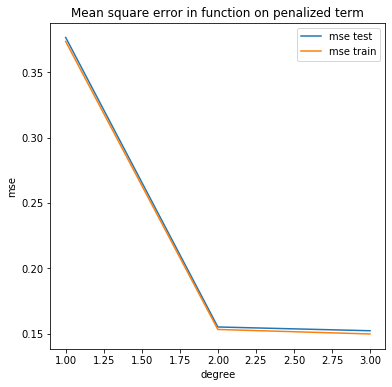

In [18]:
plt.figure(figsize=(6,6))
plt.plot(degree , mse_te, label = "mse test")
plt.plot(degree , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function on penalized term")
plt.xlabel("degree")
plt.ylabel("mse")
plt.show()

In [19]:
print("the best mse is :", mse_te[1] ," alpha ",alphas[1] )

the best mse is : 0.15507901270075017  alpha  0.0004281332398719391


###### Let's plot a few CL and their predictions

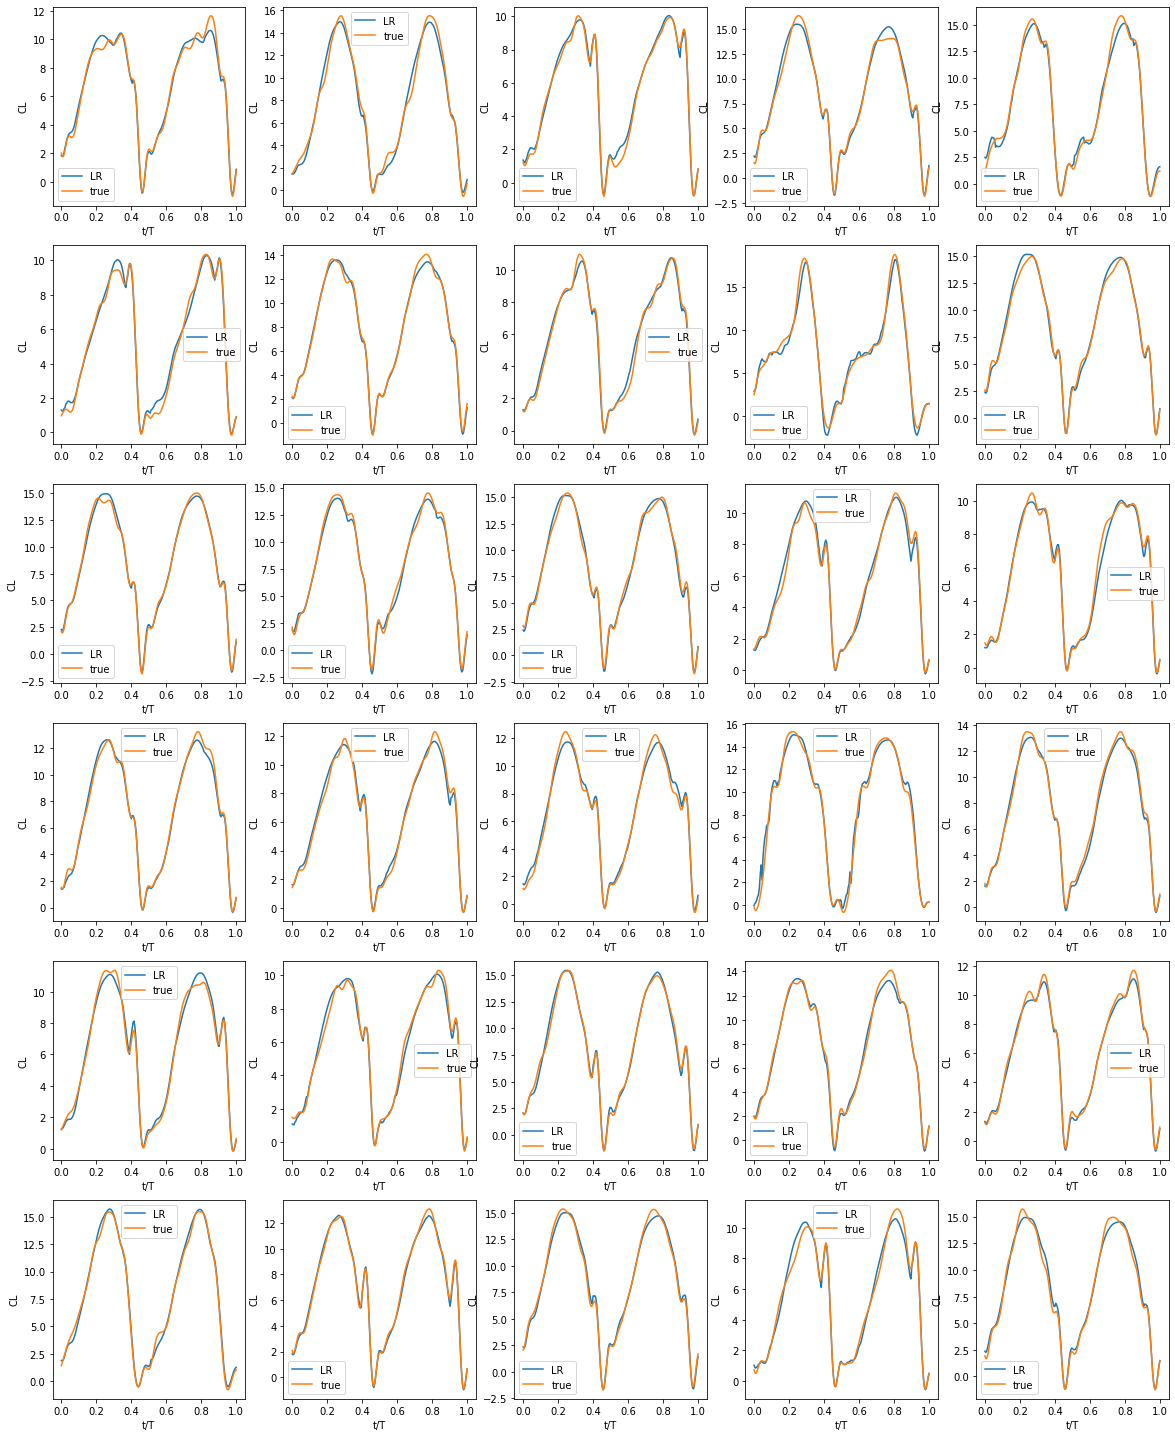

In [20]:
degree_ = 2
n = 5
alpha_=0.0162
X_train =CL[:N_train,0,:]
X_test = CL[N_train:,0,:]
Y_train = CL[:N_train,1,:]
Y_test= CL[N_train:,1,:]
y_pred = generate_prediction_n(  X_train, X_test ,Y_train, Y_test, alpha_ ,n, degree_)
N = 30
fig = plt.figure(figsize = (20,5*(N//5))) 
gs = gridspec.GridSpec((N+5)//5 , 5)
h = 0
x=np.linspace(0,1,196)
for i in range(N):
    fig_ax = fig.add_subplot(gs[h//5, h%5])
    h += 1
    fig_ax.plot(x,y_pred[i,:].T,label ='LR')
    fig_ax.plot(x,Y_test[i,2:198],label='true')
    fig_ax.set_xlabel('t/T')
    fig_ax.set_ylabel('CL')
    plt.legend()

# Conclusion :
We then choose for CP :
- Window = 5
- degree = 2
- regularizer term alpha = 0.000428

The Best MSE = 0.7846

And for CL :
- Window = 5
- degree = 2
- regularizer term alpha = 0.000428

The Best MSE is = 0.1551